# 聚类算法之k-means聚类

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # 绘图风格
import numpy as np

## k-means简介
k-means 算法在不带标签的多维数据集中寻找确定数量的簇。最优的聚类结果需要符合以下两个假设。
- “簇中心点”（cluster center）是属于该簇的所有数据点坐标的算术平均值。
- 一个簇的每个点到该簇中心点的距离，比到其他簇中心点的距离短

E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


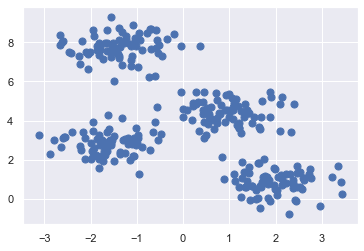

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

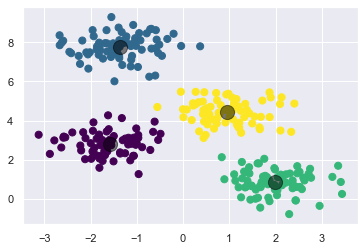

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## k-means算法：期望最大化
k-means 方法使用了一种容易理解、便于重复的期望最大化算法取代了穷举搜索。

期望最大化（expectation-maximization， E-M）是一种非常强大的算法，应用于数据科学的很多场景中。 k-means 是该算法的一个非常简单并且易于理解的应用，下面将简单介绍E-M 算法。简单来说，期望最大化方法包含以下步骤。
- 猜测一些簇中心点。
- 重复直至收敛。
    - 期望步骤（E-step）：将点分配至离其最近的簇中心点。
    - 最大化步骤（M-step）：将簇中心点设置为所有点坐标的平均值。

有些算法对每个簇的聚类效果有更好的度量方式（例如高斯混合模型， Gaussian mixture models，详情请参见 5.12 节），还有一些算法可以选择一个合适的簇数量（例如 DBSCAN、均值漂移或者近邻传播，这些都是sklearn.cluster 的子模块）。

**k-means 算法只能确定线性聚类边界**:

k-means 的基本模型假设（与其他簇的点相比，数据点更接近自己的簇中心点）表明，
当簇中心点呈现非线性的复杂形状时，该算法通常不起作用。

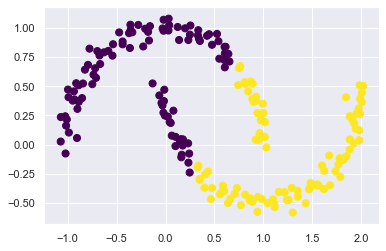

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis')

这个情形让人想起 5.7 节介绍的内容，当时我们通过一个核变换将数据投影到更高维的空间，投影后的数据使线性分离成为可能。或许可以使用同样的技巧解决 k-means 算法无法处理非线性边界的问题。

这种核 k-means 算法在 Scikit-Learn 的SpectralClustering 评估器中实现，它使用最近邻图（the graph of nearest neighbors）来计算数据的高维表示，然后用 k-means 算法分配标签（如下图所示）：

E:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


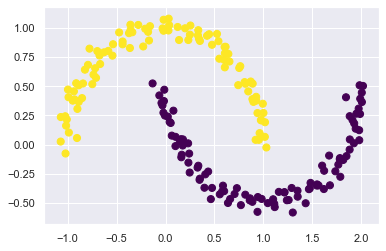

In [6]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,
                affinity='nearest_neighbors',
                assign_labels='kmeans')

labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

**当数据量较大时， k-means 会很慢**

由于 k-means 的每次迭代都必须获取数据集所有的点，因此随着数据量的增加，算法
会变得缓慢。你可能会想到将“每次迭代都必须使用所有数据点”这个条件放宽，例
如每一步仅使用数据集的一个子集来更新簇中心点。这恰恰就是批处理（batch-based）k-means 算法的核心思想，该算法在 sklearn.cluster.MiniBatchKMeans 中实现。